In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### Reading the Data

In [17]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [19]:
data['Species'] = data['Species'].str.replace('Iris-','')

In [20]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [21]:
data = data.drop(columns=['Id'])

In [22]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
data = data.rename(columns={'SepalLengthCm':'sepallength','SepalWidthCm':'sepalwidth','PetalLengthCm':'petallength','PetalWidthCm':'petalwidth','Species':'species'})
data.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Encoding the Data into Numerical Form

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl.fit(data.species)
data.species = lbl.transform(data.species)
data

In [31]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [32]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

### Identifying No. of Clusters suitable for Model Using Elbow Method

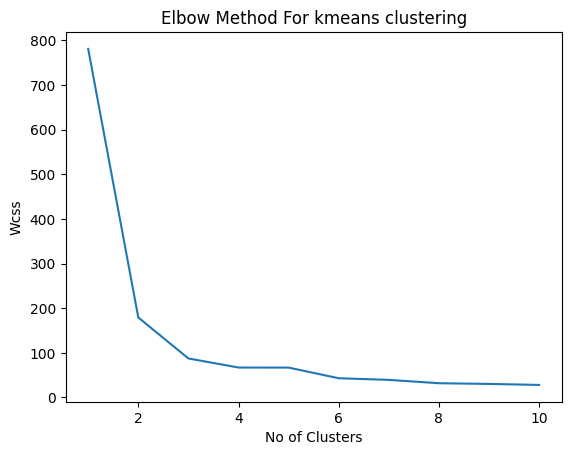

In [33]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('Wcss')
plt.title('Elbow Method For kmeans clustering')
plt.show()

In [49]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=100,random_state=0)
answers = kmeans.fit_predict(x)

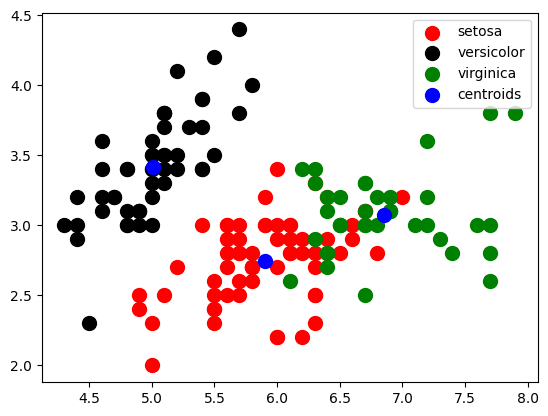

In [50]:
plt.scatter(x[answers==0,0],x[answers==0,1],s=100,c='red',label='setosa')
plt.scatter(x[answers==1,0],x[answers==1,1],s=100,c='black',label='versicolor')
plt.scatter(x[answers==2,0],x[answers==2,1],s=100,c='green',label='virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue',label='centroids')
plt.legend()